# Study MESA models of $\zeta$ Ophiuchi
author: [Mathieu Renzo](mailto:mrenzo@flatironinstitute.org)

In [6]:
import sys
# the line below import stuff from git@github.com:mathren90/plotFunc.git
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
from plotDefaults import *
# plot_aux defines many auxiliary functions to make plots
from plot_aux import *

In [7]:
set_plotDefaults()

done in plotDefaults.py


/mnt/home/mrenzo/ceph/RUNS/ZETA_OPH/Z_0.01/


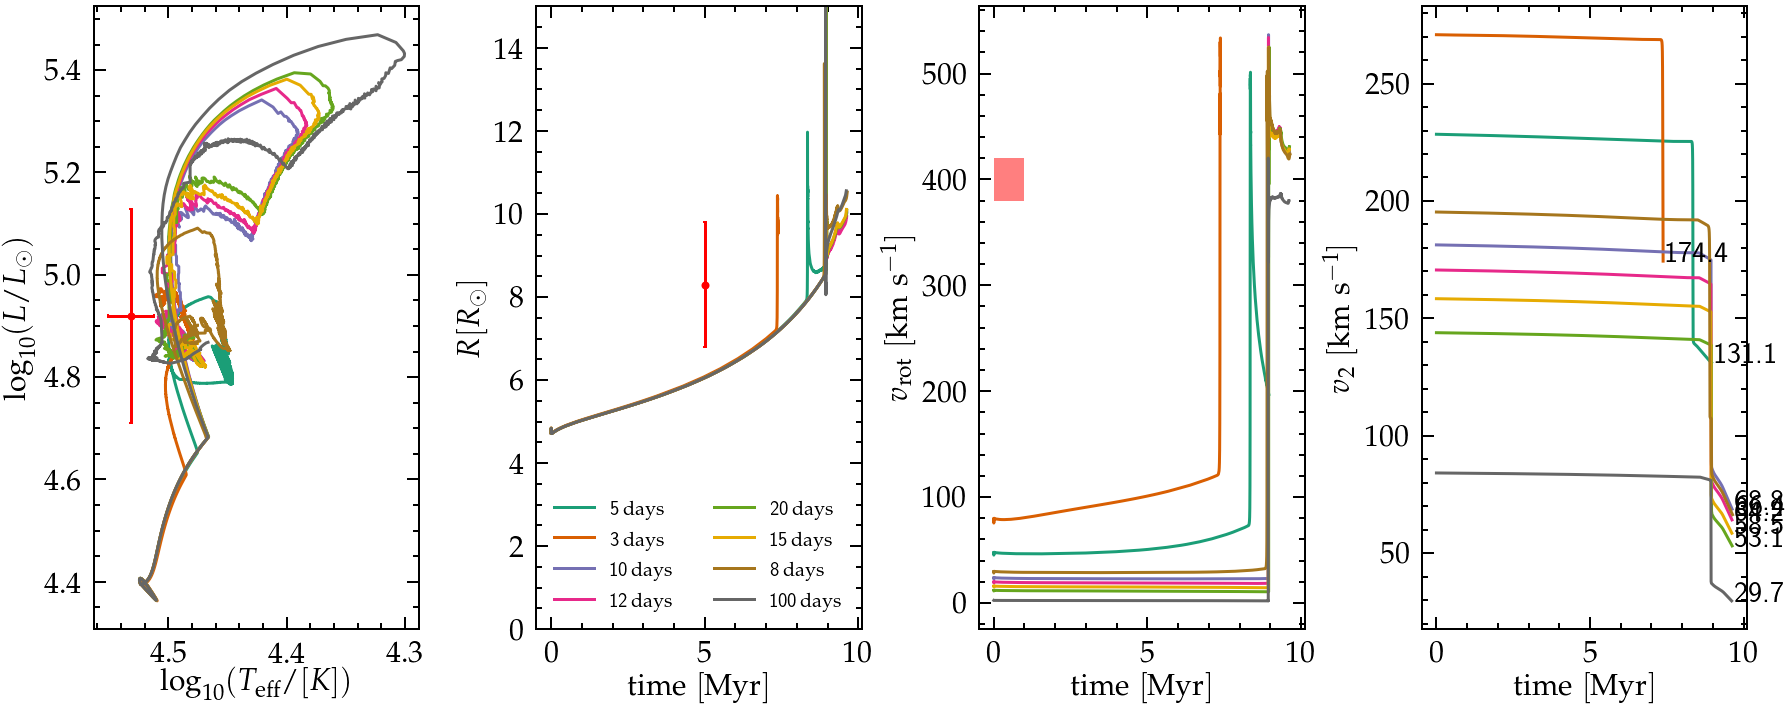

In [8]:
## grid of models at Z=0.01 varying P
def diagnostic_agreement_zeta_oph(grid_folder):
    """ plot HRD, rotation and omega_div_omega_crit for many models """
    print(colored(grid_folder, "blue"))
    # this might need adjustment later on
    models = glob.glob(grid_folder+"/*/")
    rainbow = plt.cm.Dark2(np.linspace(0,1,len(models)))
    # define figure axis
    fig = plt.figure(figsize=(25,10))
    gs = gridspec.GridSpec(1,4)
    # define axes
    # HRD
    ax_HRD = fig.add_subplot(gs[0])
    ax_HRD.invert_xaxis()
    ax_HRD.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
    ax_HRD.set_ylabel(r"$\log_{10}(L/L_\odot)$")
    zeta_oph_HRD(ax_HRD)
    # radius vs. time
    ax_radius = fig.add_subplot(gs[1])
    ax_radius.set_xlabel(r"$\mathrm{time}\ [\mathrm{Myr}]$")
    ax_radius.set_ylabel(r"$R [R_\odot]$")
    ax_radius.set_ylim(0,15)
    zeta_oph_radius(ax_radius)
    # rotation vs. time
    ax_rot = fig.add_subplot(gs[2])
    ax_rot.set_xlabel(r"$\mathrm{time}\ [\mathrm{Myr}]$")
    ax_rot.set_ylabel(r"$v_\mathrm{rot} \ [\mathrm{km\ s^{-1}}]$")
    xmin, xmax = ax_rot.get_xlim()
    vsini, err_vsini = get_zeta_oph_vsini()
    ax_rot.fill_between(np.linspace(xmin, xmax,2), [vsini-err_vsini], [vsini+err_vsini], facecolor='r', alpha=0.5, zorder=1)
    # bx_rot = ax_rot.twinx()
    # bx_rot.set_ylabel(r"$\omega/\omega_\mathrm{crit}$")
    # chemistry
    # ax_chem = fig.add_subplot(gs[3])
    # ax_chem.set_xlabel(r"$\mathrm{time}\ [\mathrm{Myr}]$")
    # ax_chem.set_ylabel(r"$\mathrm{Surface\ mass\ fraction}\ X_i$")
    # ax_chem.set_ylim(1e-4,1)
    ax_v2 =  fig.add_subplot(gs[3])
    ax_v2.set_xlabel(r"$\mathrm{time}\ [\mathrm{Myr}]$")
    ax_v2.set_ylabel(r"$v_2 \ [\mathrm{km\ s^{-1}}]$")

    
    for model in models:
        Period = model.split('/')[-2].strip('P')
        color  = rainbow[models.index(model)]
        bfile  = model+'/binary_history.data' 
        hfile1 = model+'/LOGS2/history.data'
        hfile2 = "" # run things forward
        # HRD
        try:
            plot_HRD(ax_HRD, hfile1, c=color, hfile2=hfile2, bfile="", label=f"{Period}"+r"$\,\mathrm{days}$")
        except:
            print(colored(model+" failed HRD", "red"))
        # radius
        try:    
            plot_radius_time(ax_radius, hfile1, c=color, hfile2=hfile2, label=f"{Period}"+r"$\,\mathrm{days}$")
        except:
            print(colored(model+" failed radius", "red"))
        # rotational velocity
        try:
            plot_surface_rotation_time(ax_rot, hfile1, c=color, hfile2=hfile2, label=f"{Period}"+r"$\,\mathrm{days}$")
            # plot_omega_div_omega_crit(bx_rot, hfile1, c=color, ls='--', hfile2="", label="")
        except:
            print(colored(model+" failed in rotation", "red"))
        # chemical
        # plot_surface_abundances(hfile1, hfile2, ax=ax_chem)
        # try:
        #     plot_surface_abundances(hfile1, hfile2, ax=ax_chem)
        # except:
        #     print(colored(model+" failed in chemistry", "red"))
        # orbital velocity accretor
        try:
            plot_orbital_v2(ax_v2, hfile1, c=color)
        except:
            print(colored(model+" failed in v2", "red"))

        
        ax_radius.legend(fontsize=20, ncol=2)
            
# test
grid_folder = "/mnt/home/mrenzo/ceph/RUNS/ZETA_OPH/Z_0.01/"
diagnostic_agreement_zeta_oph(grid_folder)

In [20]:
# this cell defines some paths to the MESA results
root = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/"

# Z=0.02
binary = root+"/fiducial/binary_to_donor_Hedepl/LOGS2/"
accretor_to_TAMS_from_model = root+"/fiducial/accretor_to_TAMS/from_model/LOGS/"
# accretor_to_TAMS_from_photo = root+"/fiducial/accretor_to_TAMS/from_photo/LOGS/"
accretor_from_TAMS_to_Cdepl = root+"/fiducial/accretor_TAMS_to_C_depl/LOGS/"

# varying Z
binary_Z001 = root+"/Z0.001/binary_to_donor_Hedepl/LOGS2/"
accretor_to_TAMS_Z001 = root+"/Z0.001/accretor_to_TAMS/LOGS/"

binary_Z005 = root+"/Z0.005/binary_to_donor_Hedepl/LOGS2/"
accretor_to_TAMS_Z005 =root+"/Z0.005/accretor_to_TAMS/LOGS/"

binary_Z007 = root+"/Z0.007/binary_to_donor_Hedepl/LOGS2/"
accretor_to_TAMS_Z007 =root+"/Z0.007/accretor_to_TAMS/LOGS/"

binary_Z01 = root+"/Z0.01/binary_to_donor_Hedepl/LOGS2/"
accretor_to_TAMS_Z01 =root+"/Z0.01/accretor_to_TAMS/LOGS/"

# case A binaries
binary_P8days = root+"/caseA_Z0.01/P8days/binary_to_donor_Hedepl/LOGS2/"
accretor_to_TAMS_P8days = root+"/caseA_Z0.01/P8days/accretor_to_TAMS/LOGS"

binary_P5days = root+"/caseA_Z0.01/P5days/binary_to_donor_Hedepl/LOGS2/"
accretor_to_TAMS_P5days = root+"/caseA_Z0.01/P5days/accretor_to_TAMS/LOGS"

# binary 50 day period
binary_P50days = root+"/Z0.01_50days/binary_to_donor_Hedepl/LOGS2/"
accretor_to_TAMS_P50days = root+"/Z0.01_50days/accretor_to_TAMS/LOGS/"

#23+18 P20 Z0.01
binary_P20_M1_23 = root+"/23Msun_donor/binary_to_donor_Hedepl/LOGS2/"
accretor_to_TAMS_P20_M1_23 = root+"/23Msun_donor/accretor_to_TAMS/LOGS/"

# comparison single stars at Z=0.02
single_star_root = root+"/fiducial/single_star_comparison/"

... Binary file does not yet exist
... let me scrub this for you


Data in /mnt/home/mrenzo/RUNS/zeta_ophiuchi//23Msun_donor/accretor_to_TAMS/LOGS//history.data has been scrubbed.
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi//23Msun_donor/accretor_to_TAMS/LOGS//history.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


Text(0, 0.5, '$\\log_{10}(L/L_\\odot)$')

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)
/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


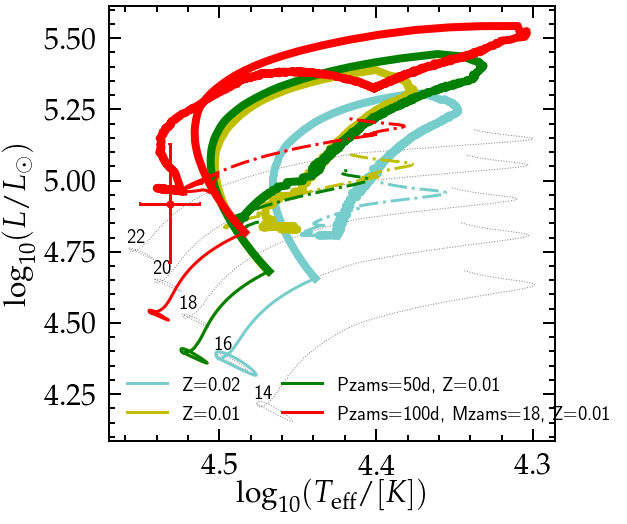

In [21]:
# plot HRD
# now make the plot --------------------------------------------
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

# single stars for reference -- these have Z=0.02
for single_star in glob.glob(single_star_root+'/*/'):
    hsingle = single_star+'/LOGS/history.data'
    logL, logTeff = getlogLlogTeff(hsingle)
    ax.plot(logTeff, logL, c='#808080',lw=1, ls=':')
    mass = single_star.split('/')[-2]
    ax.text(logTeff[0]+0.001, logL[0]+0.02, mass, fontsize=20, zorder=0)

# Z=0.02 ------------------------------------------------------
hfile1 = binary+'/history.data'
hfile2 = accretor_to_TAMS_from_model+'/history.data'
plot_HRD(ax, hfile1, c='#77CCCC', hfile2=hfile2, bfile=binary+"../binary_history.data", label=r"Z=0.02")
# the HRD tracks are the same starting from model or photo
# hfile2 = accretor_to_TAMS_from_photo+'/history.data'
# logL, logTeff = getlogLlogTeff(hfile2)
# ax.plot(logTeff, logL, c='r', ls='--', zorder=2)

# uncomment this to show the evolution until C depletion
# hfile3 = accretor_from_TAMS_to_Cdepl+'/history.data'
# logL, logTeff = getlogLlogTeff(hfile3)
# ax.plot(logTeff, logL, c='#114477', zorder=2)
# -----------------------------------------------------------
# TODO: HR diagram of the low metallicity models is weird. Evolving single stars gives a different result.
# # # Z = 0.001 
# hfile1 = binary_Z001+'/history.data'
# hfile2 = accretor_to_TAMS_Z001+'/history.data'
# plot_HRD(ax, hfile1, c='#4477AA', hfile2=hfile2, bfile=binary_Z001+"../binary_history.data", label="Z=0.001")
# # -----------------------------------------------------------
# # # Z = 0.005
# hfile1 = binary_Z005+'/history.data'
# hfile2 = accretor_to_TAMS_Z005+'history.data'
# plot_HRD(ax, hfile1, c='m', hfile2=hfile2, bfile=binary_Z005+"../binary_history.data", label="Z=0.005")
# # -----------------------------------------------------------
# # # Z = 0.007
# hfile1 = binary_Z007+'/history.data'
# hfile2 = accretor_to_TAMS_Z007+'history.data'
# plot_HRD(ax, hfile1, c='g', hfile2=hfile2, bfile=binary_Z007+"../binary_history.data", label="Z=0.007")
# -----------------------------------------------------------
# # Z = 0.01
hfile1 = binary_Z01+'/history.data'
hfile2 = accretor_to_TAMS_Z01+'/history.data'
plot_HRD(ax, hfile1, c='y', hfile2=hfile2, bfile=binary_Z01+"../binary_history.data", label="Z=0.01")
# -----------------------------------------------------------
# # #case A  Z = 0.01
# hfile1 = binary_P8days+'/history.data'
# hfile2 = accretor_to_TAMS_P8days+'/history.data'
# plot_HRD(ax, hfile1,c='#660099', hfile2=hfile2, bfile=binary_P8days+"../binary_history.data", label="Pzams=8d, Z=0.01")
# # -----------------------------------------------------------
# # #case A  Z = 0.01
# hfile1 = binary_P5days+'/history.data'
# hfile2 = accretor_to_TAMS_P5days+'/history.data'
# plot_HRD(ax, hfile1,c='m', hfile2=hfile2, bfile=binary_P5days+"../binary_history.data", label="Pzams=5d, Z=0.01")
# -----------------------------------------------------------
# #late case B  Z = 0.01
hfile1 = binary_P50days+'/history.data'
hfile2 = accretor_to_TAMS_P50days+'/history.data'
plot_HRD(ax, hfile1,c='g', hfile2=hfile2, bfile=binary_P50days+"../binary_history.data", label="Pzams=50d, Z=0.01")
# 23+18 instead of 20+16, Z=0.01
hfile1 = binary_P20_M1_23+'/history.data'
hfile2 = accretor_to_TAMS_P20_M1_23+"/history.data" 
plot_HRD(ax, hfile1,c='r', hfile2=hfile2, bfile=binary_P20_M1_23+"../binary_history.data", label="Pzams=100d, Mzams=18, Z=0.01")


ax.legend(ncol=2, fontsize=20)

zeta_oph_HRD(ax)
    
ax.invert_xaxis()
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
ax.set_ylabel(r"$\log_{10}(L/L_\odot)$")

Text(0, 0.5, '$v_\\mathrm{rot} \\ \\mathrm{[km\\ s^{-1}]}$')

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)
/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


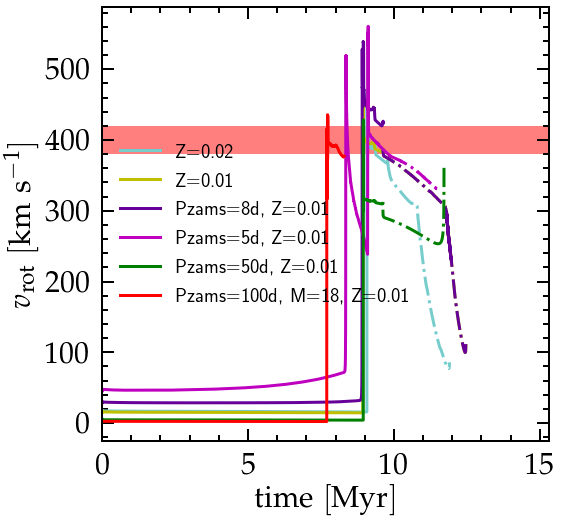

In [15]:
# rotation history
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

# -----------------------------------------------------------
# Z = 0.02
hfile1 = binary+'/history.data'
hfile2 = accretor_to_TAMS_from_model+'/history.data'
plot_surface_rotation_time(ax, hfile1, c='#77CCCC', hfile2=hfile2, label="Z=0.02")
# -----------------------------------------------------------
# # Z = 0.001 
# hfile1 = binary_Z001+'/history.data'
# hfile2 = accretor_to_TAMS_Z001+'/history.data'
# plot_surface_rotation_time(ax, hfile1, c='#4477AA', hfile2=hfile2, label="Z=0.001")
# # -----------------------------------------------------------
# # # Z = 0.005
# hfile1 = binary_Z005+'/history.data'
# hfile2 = accretor_to_TAMS_Z005+'history.data'
# plot_surface_rotation_time(ax, hfile1, c='m', hfile2=hfile2, label="Z=0.005")
# # -----------------------------------------------------------
# # # Z = 0.007
# hfile1 = binary_Z007+'/history.data'
# hfile2 = accretor_to_TAMS_Z007+'history.data'
# plot_surface_rotation_time(ax, hfile1, c='g', hfile2=hfile2, label="Z=0.007")
# # -----------------------------------------------------------
# # Z = 0.01
hfile1 = binary_Z01+'/history.data'
hfile2 = accretor_to_TAMS_Z01+'/history.data'
plot_surface_rotation_time(ax, hfile1, c='y', hfile2=hfile2, label="Z=0.01")
# -----------------------------------------------------------
# # case A Z = 0.01, P=8d
hfile1 = binary_P8days+'/history.data'
nhfile2 = accretor_to_TAMS_P8days+'/history.data'
plot_surface_rotation_time(ax, hfile1, c='#660099', hfile2=hfile2, label="Pzams=8d, Z=0.01")
# -----------------------------------------------------------
# # case A Z = 0.01, P=5d
hfile1 = binary_P5days+'/history.data'
hfile2 = accretor_to_TAMS_P5days+'/history.data'
plot_surface_rotation_time(ax, hfile1, c='m', hfile2=hfile2, label="Pzams=5d, Z=0.01")
# -----------------------------------------------------------
# # case A Z = 0.01, P=50d
hfile1 = binary_P50days+'/history.data'
hfile2 = accretor_to_TAMS_P50days+'/history.data'
plot_surface_rotation_time(ax, hfile1, c='g', hfile2=hfile2, label="Pzams=50d, Z=0.01")
# more massive 23+18 P100
hfile1 = binary_P20_M1_23+'/history.data'
hfile2 = "" 
plot_surface_rotation_time(ax, hfile1, c='r', hfile2=hfile2, label="Pzams=100d, M=18, Z=0.01")

# overplot observational range
vsini, err_vsini = get_zeta_oph_vsini()
ax.set_xlim(0, 15.3)
xmin, xmax = ax.get_xlim()
ax.fill_between(np.linspace(xmin, xmax,2), [vsini-err_vsini], [vsini+err_vsini], facecolor='r', alpha=0.5, zorder=1)
ax.legend(loc="center left", fontsize=20)
ax.set_xlabel(r"$\mathrm{time \ [Myr]}$")
# ax.set_xlim(xmin=8)
# ax.set_ylim(ymin=200)
ax.set_ylabel(r"$v_\mathrm{rot} \ \mathrm{[km\ s^{-1}]}$")

Text(0, 0.5, '$\\omega/\\omega_\\mathrm{crit}$')

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


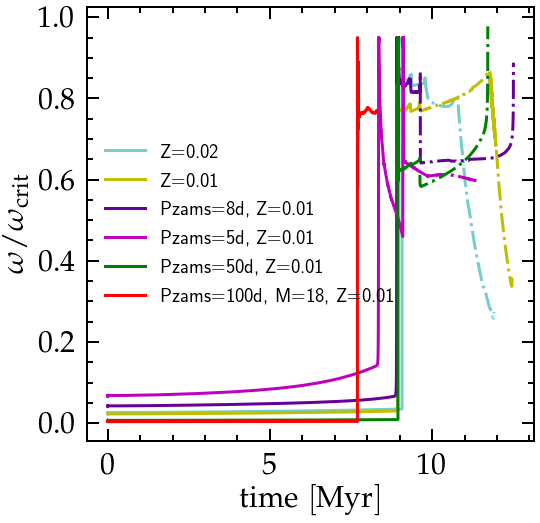

In [16]:
# omega_div_omega_crit vs. time
# now make plot
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])


# Z=0.02 ------------------------------------------------------
hfile1 = binary+'/history.data'
hfile2 = accretor_to_TAMS_from_model+'/history.data'
plot_omega_div_omega_crit(ax, hfile1, c='#77CCCC', hfile2=hfile2, label=r"Z=0.02")

# the HRD tracks are the same starting from model or photo
# hfile2 = accretor_to_TAMS_from_photo+'/history.data'
# logL, logTeff = getlogLlogTeff(hfile2)
# ax.plot(logTeff, logL, c='r', ls='--', zorder=2)

# uncomment this to show the evolution until C depletion
# hfile3 = accretor_from_TAMS_to_Cdepl+'/history.data'
# logL, logTeff = getlogLlogTeff(hfile3)
# ax.plot(logTeff, logL, c='#114477', zorder=2)
# -----------------------------------------------------------
# # Z = 0.001 
# hfile1 = binary_Z001+'/history.data'
# hfile2 = accretor_to_TAMS_Z001+'/history.data'
# plot_omega_div_omega_crit(ax, hfile1, c='#4477AA', hfile2=hfile2, label="Z=0.001")
# # -----------------------------------------------------------
# # # Z = 0.005
# hfile1 = binary_Z005+'/history.data'
# hfile2 = accretor_to_TAMS_Z005+'history.data'
# plot_omega_div_omega_crit(ax, hfile1, c='m', hfile2=hfile2, label="Z=0.005")
# # -----------------------------------------------------------
# # # Z = 0.007
# hfile1 = binary_Z007+'/history.data'
# hfile2 = "" # accretor_to_TAMS_Z005+'history.data'
# plot_omega_div_omega_crit(ax, hfile1, c='g', hfile2=hfile2, label="Z=0.007")
# -----------------------------------------------------------
# # Z = 0.01
hfile1 = binary_Z01+'/history.data'
hfile2 = accretor_to_TAMS_Z01+'/history.data'
plot_omega_div_omega_crit(ax, hfile1, c='y', hfile2=hfile2, label="Z=0.01")
# -----------------------------------------------------------
# case A Z = 0.01, P=8d
hfile1 = binary_P8days+'/history.data'
hfile2 = accretor_to_TAMS_P8days+'/history.data'
plot_omega_div_omega_crit(ax, hfile1, c='#660099', hfile2=hfile2, label="Pzams=8d, Z=0.01")
# -----------------------------------------------------------
# case A Z = 0.01, P=5d
hfile1 = binary_P5days+'/history.data'
hfile2 = accretor_to_TAMS_P5days+'/history.data'
plot_omega_div_omega_crit(ax, hfile1, c='m', hfile2=hfile2, label="Pzams=5d, Z=0.01")
# late case B Z = 0.01, P=50d
hfile1 = binary_P50days+'/history.data'
hfile2 = accretor_to_TAMS_P50days+'/history.data'
plot_omega_div_omega_crit(ax, hfile1, c='g', hfile2=hfile2, label="Pzams=50d, Z=0.01")
# more massive 23+18 P100
hfile1 = binary_P20_M1_23+'/history.data'
hfile2 = "" 
plot_omega_div_omega_crit(ax, hfile1, c='r', hfile2=hfile2, label="Pzams=100d, M=18, Z=0.01")

# ax.set_xlim(xmin=8)
ax.legend(fontsize=20)
ax.set_xlabel(r"$\mathrm{time \ [Myr]}$")
ax.set_ylabel(r"$\omega/\omega_\mathrm{crit}$")

Text(0, 0.5, '$\\log_{10}(g/\\mathrm{cm\\ s^{-2}})$')

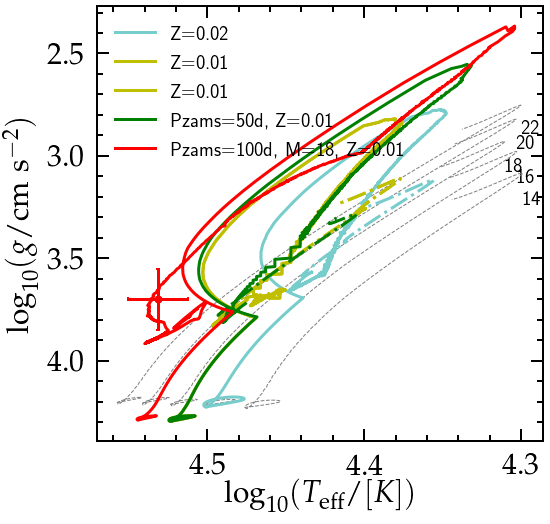

In [17]:
# spectroscopic HRD

# now make plot
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

for single_star in glob.glob(single_star_root+'/*/'):
    hsingle = single_star+'/LOGS/history.data'
    logg, logTeff = getlogglogTeff(hsingle)
    ax.plot(logTeff, logg, c='#808080',lw=1, ls='--')
    mass = single_star.split('/')[-2]
    ax.text(min(logTeff), logg[-1]+0.02, mass, fontsize=20, zorder=0)


# Z=0.02 ------------------------------------------------------
hfile1 = binary+'/history.data'
hfile2 = accretor_to_TAMS_from_model+'/history.data'
plot_spectroscopic_HRD(ax, hfile1, c='#77CCCC', hfile2=hfile2, label=r"Z=0.02")

# the HRD tracks are the same starting from model or photo
# hfile2 = accretor_to_TAMS_from_photo+'/history.data'
# logL, logTeff = getlogLlogTeff(hfile2)
# ax.plot(logTeff, logL, c='r', ls='--', zorder=2)

# uncomment this to show the evolution until C depletion
# hfile3 = accretor_from_TAMS_to_Cdepl+'/history.data'
# logL, logTeff = getlogLlogTeff(hfile3)
# ax.plot(logTeff, logL, c='#114477', zorder=2)
# -----------------------------------------------------------
# # Z = 0.001 
# hfile1 = binary_Z001+'/history.data'
# hfile2 = accretor_to_TAMS_Z001+'/history.data'
# plot_spectroscopic_HRD(ax, hfile1, c='#4477AA', hfile2=hfile2, label="Z=0.001")
# # -----------------------------------------------------------
# # # Z = 0.005
# hfile1 = binary_Z005+'/history.data'
# hfile2 = accretor_to_TAMS_Z005+'history.data'
# plot_spectroscopic_HRD(ax, hfile1, c='m', hfile2=hfile2, label="Z=0.005")
# # -----------------------------------------------------------
# # # Z = 0.007
# hfile1 = binary_Z007+'/history.data'
# hfile2 = accretor_to_TAMS_Z007+'history.data'
# plot_spectroscopic_HRD(ax, hfile1, c='g', hfile2=hfile2, label="Z=0.005")
# -----------------------------------------------------------
# # Z = 0.01
hfile1 = binary_Z01+'/history.data'
hfile2 = accretor_to_TAMS_Z01+'/history.data'
plot_spectroscopic_HRD(ax, hfile1, c='y', hfile2=hfile2, label="Z=0.01")
# -----------------------------------------------------------
# # Z = 0.01
hfile1 = binary_Z01+'/history.data'
hfile2 = accretor_to_TAMS_Z01+'/history.data'
plot_spectroscopic_HRD(ax, hfile1, c='y', hfile2=hfile2, label="Z=0.01")
# -----------------------------------------------------------
# # # Z = 0.01
# hfile1 = binary_P8days+'/history.data'
# hfile2 = accretor_to_TAMS_P8days+'/history.data'
# plot_spectroscopic_HRD(ax, hfile1, c='#660099', hfile2=hfile2, label="Pzams=8d, Z=0.01")
# # -----------------------------------------------------------
# # # Z = 0.01
# hfile1 = binary_P5days+'/history.data'
# hfile2 = accretor_to_TAMS_P5days+'/history.data'
# plot_spectroscopic_HRD(ax, hfile1, c='m', hfile2=hfile2, label="Pzams=5d, Z=0.01")
# -----------------------------------------------------------
# # Z = 0.01
hfile1 = binary_P50days+'/history.data'
hfile2 = accretor_to_TAMS_P50days+'/history.data'
plot_spectroscopic_HRD(ax, hfile1, c='g', hfile2=hfile2, label="Pzams=50d, Z=0.01")
# more massive
hfile1 = binary_P20_M1_23+'/history.data'
hfile2 = "" 
plot_spectroscopic_HRD(ax, hfile1, c='r', hfile2=hfile2, label="Pzams=100d, M=18, Z=0.01")


zeta_oph_spectroscopicHRD(ax)
ax.legend(fontsize=20)    
ax.invert_xaxis()
ax.invert_yaxis()    
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
ax.set_ylabel(r"$\log_{10}(g/\mathrm{cm\ s^{-2}})$")

In [6]:
# surface composition accretor    
# make large plot with all the compositions
fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(3, 2)

# Z=0.02 ------------------------------------------------------
hfile1 = binary+'/history.data'
hfile2 = accretor_to_TAMS_from_model+'/history.data'
ax = fig.add_subplot(gs[0])
ax.set_ylim(ymin=1e-10)
plot_surface_abundances(hfile1, hfile2=hfile2, ax=ax, label=r"Z=0.02")
# -----------------------------------------------------------
# # Z = 0.001 
hfile1 = binary_Z001+'/history.data'
hfile2 = accretor_to_TAMS_Z001+'/history.data'
ax = fig.add_subplot(gs[1])
ax.set_ylim(ymin=1e-10)
plot_surface_abundances(hfile1, hfile2=hfile2,ax=ax, label="Z=0.001")
# -----------------------------------------------------------
# # Z = 0.005
hfile1 = binary_Z005+'/history.data'
hfile2 = accretor_to_TAMS_Z005+'history.data'
ax = fig.add_subplot(gs[2])
ax.set_ylim(ymin=1e-10)
plot_surface_abundances(hfile1, hfile2=hfile2, ax=ax, label="Z=0.005")
# -----------------------------------------------------------
# # Z = 0.007
hfile1 = binary_Z007+'/history.data'
hfile2 = accretor_to_TAMS_Z007+'history.data'
ax = fig.add_subplot(gs[3])
ax.set_ylim(ymin=1e-10)
plot_surface_abundances(hfile1=hfile1, hfile2=hfile2, ax=ax, label="Z=0.007")
# -----------------------------------------------------------
# # Z = 0.01
hfile1 = binary_Z01+'/history.data'
hfile2 = accretor_to_TAMS_Z01+'/history.data'
ax = fig.add_subplot(gs[4])
ax.set_ylim(ymin=1e-10)
plot_surface_abundances(hfile1, hfile2=hfile2, ax=ax, label="Z=0.01")
# # case A Z = 0.01
hfile1 = binary_P8days+'/history.data'
hfile2 = accretor_to_TAMS_P8days+'/history.data'
ax = fig.add_subplot(gs[5])
ax.set_ylim(ymin=1e-10)
plot_surface_abundances(hfile1, hfile2=hfile2, ax=ax, label="case A, Z=0.01")

NameError: name 'binary' is not defined

<Figure size 1440x1440 with 0 Axes>

NameError: name 'binary' is not defined

In [ ]:
# surface composition donor
fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(3, 2)

# Z=0.02 ------------------------------------------------------
hfile1 = binary+'../LOGS1/history.data'
hfile2 = ""
ax = fig.add_subplot(gs[0])
plot_surface_abundances(hfile1, hfile2=hfile2, ax=ax, label=r"Z=0.02")
# -----------------------------------------------------------
# # # Z = 0.001 
# hfile1 = binary_Z001+'../LOGS1/history.data'
# hfile2 = ""
# ax = fig.add_subplot(gs[1])
# plot_surface_abundances(hfile1, hfile2=hfile2,ax=ax, label="Z=0.001")
# # -----------------------------------------------------------
# # # Z = 0.005
# hfile1 = binary_Z005+'../LOGS1/history.data'
# hfile2 = ""
# ax = fig.add_subplot(gs[2])
# plot_surface_abundances(hfile1, hfile2=hfile2, ax=ax, label="Z=0.005")
# # -----------------------------------------------------------
# # # Z = 0.007
# hfile1 = binary_Z007+'../LOGS1/history.data'
# hfile2 = ""
# ax = fig.add_subplot(gs[3])
# plot_surface_abundances(hfile1=hfile1, hfile2=hfile2, ax=ax, label="Z=0.007")
# -----------------------------------------------------------
# # Z = 0.01
hfile1 = binary_Z01+'../LOGS1/history.data'
hfile2 = ""
ax = fig.add_subplot(gs[1])
plot_surface_abundances(hfile1, hfile2=hfile2, ax=ax, label="Z=0.01")
# # case A Z = 0.01
hfile1 = binary_P8days+'../LOGS1/history.data'
hfile2 = ""
ax = fig.add_subplot(gs[4])
# # case A Z = 0.01
hfile1 = binary_P5days+'../LOGS1/history.data'
hfile2 = ""
ax = fig.add_subplot(gs[5])


plot_surface_abundances(hfile1, hfile2=hfile2, ax=ax, label="case A, Z=0.01")

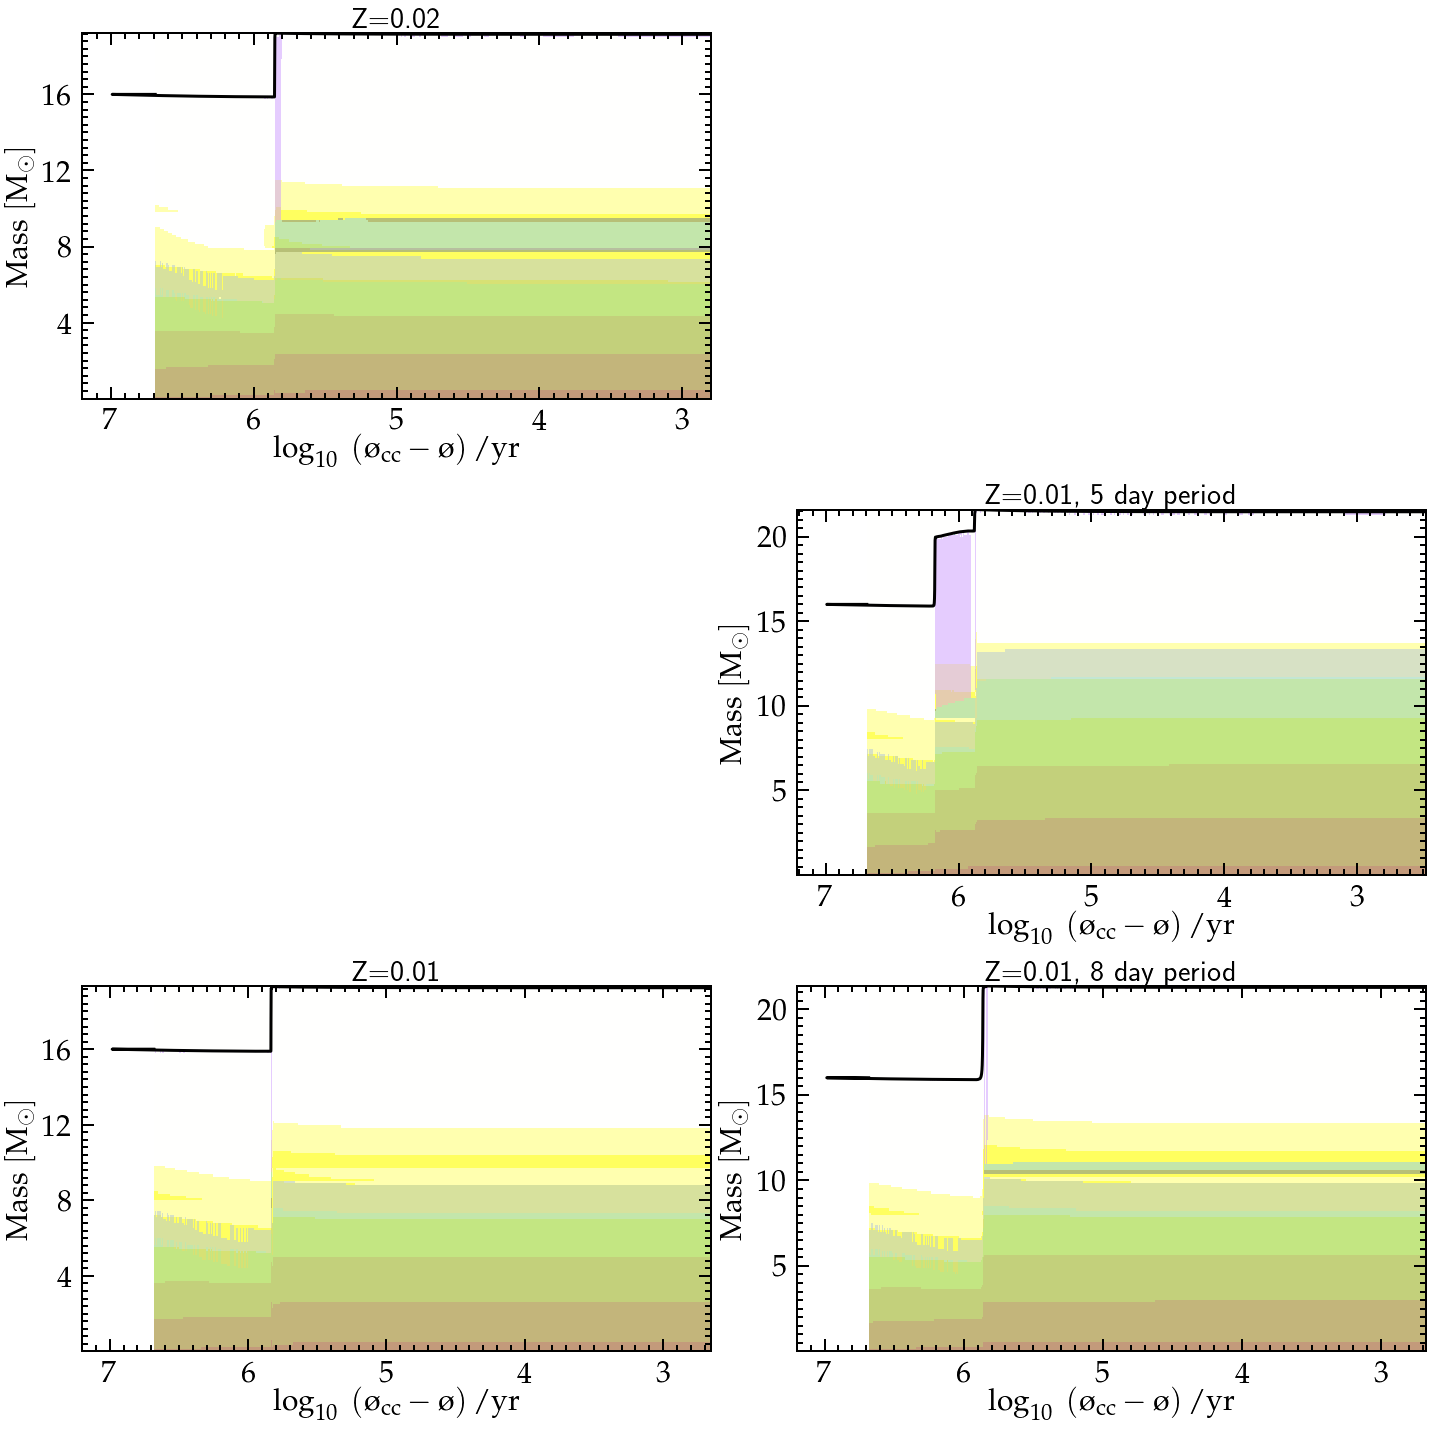

In [35]:
# Kippenhahn diagrams
def mk_Kippenhahn_accretor(ax, folder, label=""):
    """
    plot the kippenhahn diagram for the accretor star
    during the binary evolution
    """
    x = 'star_age' # 'model_number' #
    y = 'mass'
    ax.set_title(label, fontsize=30)
    mmm.loadHistory(f=folder)
    ppp.plotKip3(mmm, fig=fig, ax=ax,
                 xaxis=x,
                 # yaxis="radius",
                 reloadHistory=False,
                 show_mass_loc=False,
                 show_mix_labels=False,
                 show=False,
                 mix_alpha=0.5,
                 # mix_hatch='//', hatch_color='#98ef56', 
                 age_lookback=True,
                 age_log=True,
                 zone_frac = 10, #0.2,
                 colorbar=False, 
                 cmin=-12.45, cmax=12.5)

    

fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(3, 2)


# Z=0.02 ------------------------------------------------------
hfile1 = binary
ax = fig.add_subplot(gs[0])
mk_Kippenhahn_accretor(ax, hfile1, label="Z=0.02")
# -----------------------------------------------------------
# # # Z = 0.001 
# hfile1 = binary_Z001
# ax = fig.add_subplot(gs[1])
# mk_Kippenhahn_accretor(ax, hfile1, label="Z=0.001")
# # -----------------------------------------------------------
# # # Z = 0.005
# hfile1 = binary_Z005
# ax = fig.add_subplot(gs[2])
# mk_Kippenhahn_accretor(ax, hfile1, label="Z=0.005")
# # -----------------------------------------------------------
# # # Z = 0.007
# hfile1 = binary_Z007
# ax = fig.add_subplot(gs[3])
# mk_Kippenhahn_accretor(ax, hfile1, label="Z=0.007")
# -----------------------------------------------------------
# # Z = 0.01
hfile1 = binary_Z01
ax = fig.add_subplot(gs[4])
mk_Kippenhahn_accretor(ax, hfile1, label="Z=0.01")
# -----------------------------------------------------------
# #case A Z = 0.01
hfile1 = binary_P8days
ax = fig.add_subplot(gs[5])
mk_Kippenhahn_accretor(ax, hfile1, label="Z=0.01, 8 day period")
# -----------------------------------------------------------
# #case A Z = 0.01
hfile1 = binary_P5days
ax = fig.add_subplot(gs[3])
mk_Kippenhahn_accretor(ax, hfile1, label="Z=0.01, 5 day period")

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/mesaPlot-0.0-py3.7.egg/mesaPlot/plot.py:981: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  func(*args, **kwargs)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  fig.canvas.print_figure(bytes_io, **kw)


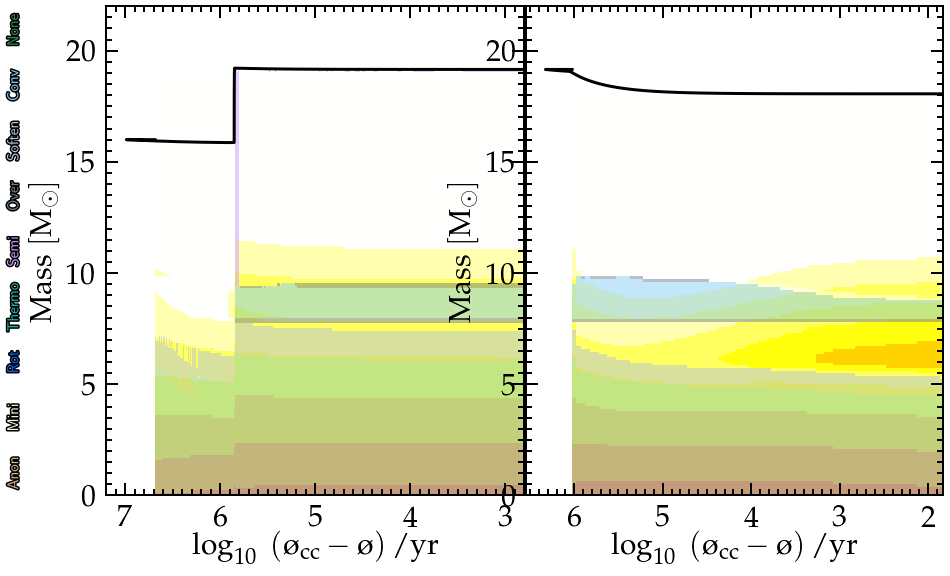

In [12]:
def Kippenhahn_combined(binary, accretor_to_TAMS, figname=""):
    fig = plt.figure(figsize=(15,9))
    gs = gridspec.GridSpec(100, 100)
    ax = fig.add_subplot(gs[:,:50])
    bx = fig.add_subplot(gs[:,50:])

    x = 'star_age' # 'model_number' #
    y = 'mass'

    mmm.loadHistory(f=binary)
    ppp.plotKip3(mmm, fig=fig, ax=ax,
                 xaxis=x,
                 # yaxis="radius",
                 reloadHistory=False,
                 show_mass_loc=False,
                 show_mix_labels=True,
                 show=False,
                 mix_alpha=0.5,# mix_hatch='//', hatch_color='#98ef56', 
                 age_lookback=True,
                 age_log=True,
                 zone_frac = 10, #0.2,
                 colorbar=False,
                 cmin=-12.45, cmax=12.5)

    mmm.loadHistory(f=accretor_to_TAMS)
    ppp.plotKip3(mmm, fig=fig, ax=bx,
                 xaxis=x,
                 # yaxis="radius",
                 reloadHistory=False,
                 show_mass_loc=False,
                 show_mix_labels=True,
                 show=False,
                 mix_alpha=0.5,# mix_hatch='//', hatch_color='#98ef56', 
                 age_lookback=True,
                 age_log=True,
                 zone_frac = 10, #0.2,
                 colorbar=False,
                 cmin=-12.45, cmax=12.5)

    ax.set_ylim(0, 22)
    bx.set_ylim(ax.get_ylim())

Kippenhahn_combined(binary, accretor_to_TAMS_from_model)
    

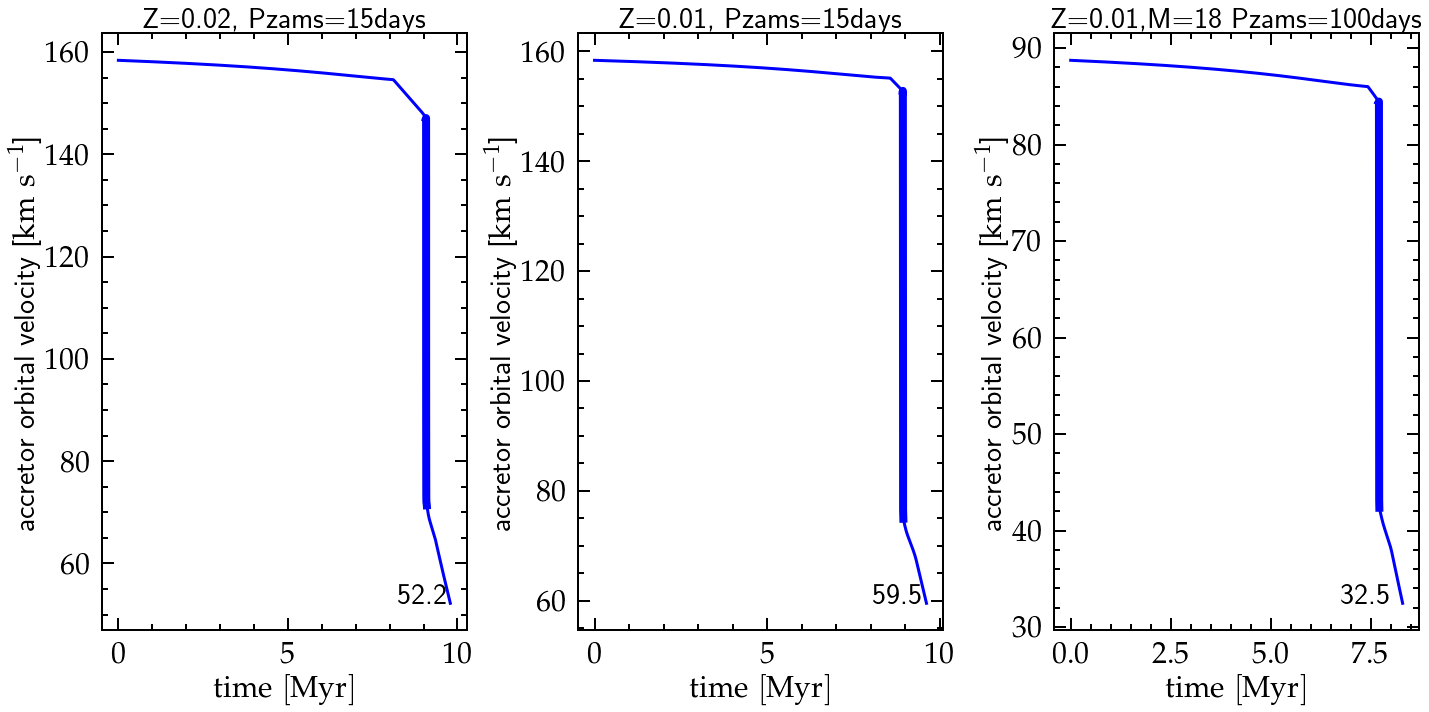

In [19]:
## orbital velocity accretor
def plot_v2(binary_hfile, ax="", label=""):
    """ plot the orbital velocity of the accretor from the binary_history.data file """
    srcb, colb = getSrcCol(binary_hfile)
    t = srcb[:, colb.index("age")]*1e-6
    v2 = srcb[:, colb.index("v_orb_2")]
    rl_relative_gap_1 = srcb[:, colb.index('rl_relative_overflow_1')]
    ind = rl_relative_gap_1 > 0

    ax.plot(t, v2, c='b')
    ax.plot(t[ind], v2[ind], lw=8, c='b')
    ax.set_title(label, size=30)
    ax.text(t[-1]-1.55, v2[-1], f"{v2[-1]:.1f}", fontsize=30)
    ax.set_xlabel(r"$\mathrm{time\ [Myr]}$")
    ax.set_ylabel(r"accretor orbital velocity [$\mathrm{km\ s^{-1}}$]")

    
# make plot for the grid
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(1,3)

# -----------------------------------------------------------
# Z=0.02
ax = fig.add_subplot(gs[0])
hfile = binary+'../binary_history.data'
plot_v2(hfile, ax, label="Z=0.02, Pzams=15days")
# -----------------------------------------------------------
# Z=0.01
ax = fig.add_subplot(gs[1])
hfile = binary_Z01+'../binary_history.data'
plot_v2(hfile, ax, label="Z=0.01, Pzams=15days")
# -----------------------------------------------------------
# # Z=0.01 case A
# ax = fig.add_subplot(gs[2])
# hfile = binary_+'../binary_history.data'
# plot_v2(hfile, ax, label="Z=0.01, Pzams=8days")
# more massive
ax = fig.add_subplot(gs[2])
hfile1 = binary_P20_M1_23+'../binary_history.data'
plot_v2(hfile1, ax, label="Z=0.01,M=18 Pzams=100days")

    

/mnt/home/mrenzo/RUNS/zeta_ophiuchi//caseA_Z0.01/P8days/binary_to_donor_Hedepl/LOGS2/../


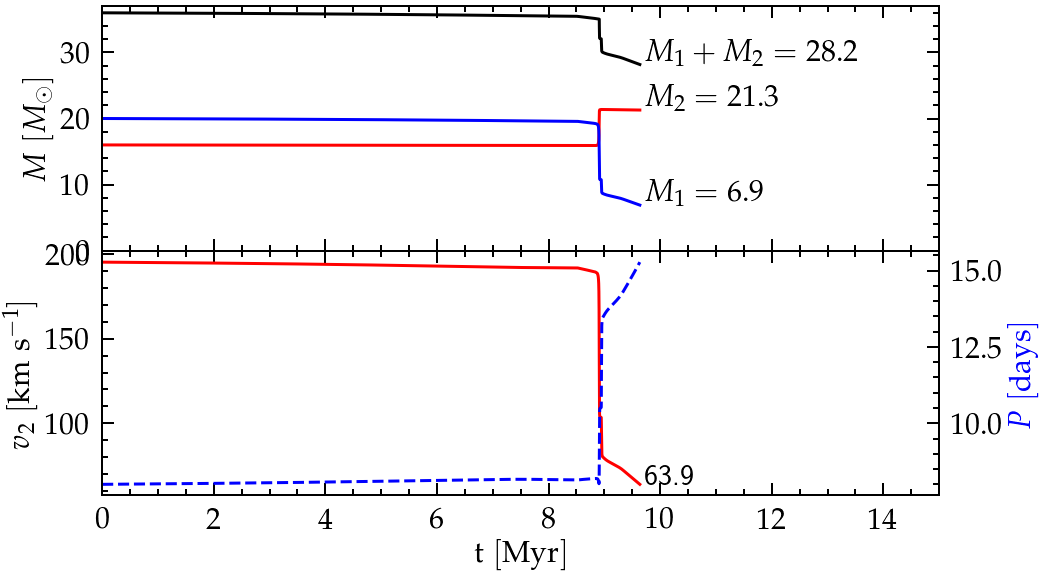

In [30]:
## masses in time
def MassVelocityEvolution(folder, convert=False, figName=""):
    print(folder)
    fig = plt.figure(figsize=(15,9))
    gs = gridspec.GridSpec(200, 100)
    ax = fig.add_subplot(gs[:100,:])
    bx = fig.add_subplot(gs[100:200,:])
    bbx = bx.twinx()
    
    srcb, colb = getSrcCol(folder+'/binary_history.data', convert, convert)
    t = srcb[:, colb.index("age")]*1e-6
    M1 = srcb[:, colb.index("star_1_mass")]
    M2 = srcb[:, colb.index("star_2_mass")]
    v2 = srcb[:, colb.index("v_orb_2")]
    P = srcb[:, colb.index("period_days")]
    
    ax.plot(t, M2, c='r', label=r"$M_2$")
    ax.plot(t, M1, c='b', label=r"$M_1$")
    ax.plot(t, M1+M2, c="k", label=r"$M_1+M_2$")

    ax.text(t[-1]+0.1, M2[-1], r"$M_2="+f"{M2[-1]:.1f}"+r"$", fontsize=30)
    ax.text(t[-1]+0.1, M1[-1], r"$M_1="+f"{M1[-1]:.1f}"+r"$", fontsize=30)
    ax.text(t[-1]+0.1, M1[-1]+M2[-1], r"$M_1+M_2="+f"{M1[-1]+M2[-1]:.1f}"+r"$", fontsize=30)
    
    
    bx.plot(t,v2, ls='-', lw=3, c='r')
    bx.text(t[-1]+0.1, v2[-1], f"{v2[-1]:.1f}", fontsize=30)
    bbx.plot(t, P, ls='--', lw=3, c='b')

    ax.set_ylim(0,37)
    ax.set_xlim(0,15)
    ax.set_xticklabels([])
    bx.set_xlim(ax.get_xlim())
    # bbx.set_ylim(90,700)
    bx.set_xlabel(r"$\mathrm{t \ [Myr]}$")
    ax.set_ylabel(r"$M \ [M_\odot]$")
    bx.set_ylabel(r"$v_2 \ [\mathrm{km\ s^{-1}}]$")
    bbx.set_ylabel(r"$P \ \mathrm{[days]}$", color="b")

MassVelocityEvolution(binary_P8days+"../", convert=True, figName="")